# Método del Trapecio

## Problema

**Sea la funcion $f(x) = e^{-x^2}$. Se solicita calcular a través de un código la integral definida de esta función en el intervalo cerrado de  [0,2], Utilizando los siguientes métodos**

## Procedimiento

- Se definen los valores correspondientes, que son la función,  y el intervalo para poder gráficarlo 

In [58]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from typing import Any,List, Optional
from collections.abc import Callable
from math import e
from sympy import simplify,lambdify,symbols,exp,sympify, init_printing


In [59]:
init_printing()
funcion:str = sympify("exp(-x**2)", locals = {"exp": exp})
x = symbols('x')

- Se grafica la función exponencial

In [60]:
funcion_pevaluar = lambdify(x,funcion,"numpy")
x_values = np.linspace(0,10,30)
y_values = funcion_pevaluar(x_values)

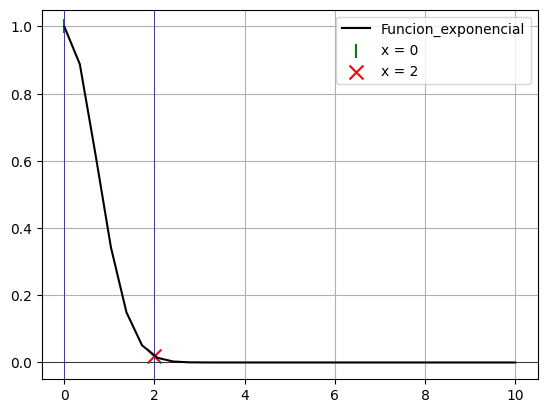

In [61]:
plt.plot(x_values,y_values, label="Funcion_exponencial", color = "k")
plt.axhline(0, color = "black", linewidth = 0.5)
plt.axvline(0, color = "blue", linewidth = 0.5)

plt.scatter(0,funcion.subs(x,0).evalf(), color = 'g', marker = '|', s = 100, label = "x = 0")
plt.scatter(2,funcion.subs(x,2).evalf(), color = 'r', marker= 'x',s= 100, label = "x = 2")
plt.axvline(2, color = "blue", linewidth = 0.5)

plt.grid(True)
plt.legend()
plt.show()

- Se realiza la función de la regla del trapecio simple utilizando la función de $I$

## $I = (b-a) \frac{f(a) + f(b)}{2}$

In [ ]:
def trapecio_s(*intervalo) -> Optional[float]:
    """ Esta funcion tiene un argumento de intervalo para poder calcular su trapecio simple

    Parameters
    ----------
    `intervalo` : *args
        Es el intervalo de donde se quiere obtener el área, [a,b]
    """
    I = (intervalo[1] - intervalo[0]) * (funcion.subs(x, intervalo[1]).evalf() + funcion.subs(x,intervalo[0]).evalf()) * 0.5
    return I

- Se llama a la función de trapecio simple para calcular el resultado

In [ ]:
trapecio_s(0,2)

- Se realiza la función del trapecio multiple $I$

## $I = \frac{h}{2}[f(x_{0}) + 2 \sum_{\substack{i=1} \\}^{n-1}{f(x_i) + f(x_n)} ]$

## $h = \frac{b-a}{2}$

## $x_i = a + i*h$

- En este caso el problema nos dice que $n = 5$

In [67]:
def trapecio_m(*intervalo) -> Optional[float]:
    """ Calcula el área dentro del intervalo utilizando el metodo del trapecio multiple

    Parameters
    ----------
    `intervalo` : *args
        Utilizando el intervalo calcula el área, [a,b]
    """
    #Se define un arreglo para guardar y sumar los valores de la suma
    sumatoria_valores:List[float|int] = []
    
    #Se define el valor de h
    h = (intervalo[1] - intervalo[0])/5
    xn = intervalo[0] + (5)*h
    
    #Se realiza el ciclo de las sumas donde xn es fijo, ya siempre es n
    for i in range(5-1):
        xi = intervalo[0] + (i+1)*h
        sumatoria_valores.append(funcion.subs(x,xn).evalf() + funcion.subs(x,xi).evalf())
    
    #x0 = intervalo[0], por lo tanto se puede sustituir directamente en la formula 

    # Se define la funcion del área
    I = (h/2)*(funcion.subs(x,intervalo[0]).evalf() + 2*sum(sumatoria_valores))

    return I

    

- Se imprime el resultado obtenido

In [68]:
trapecio_m(0,2)